# Задание 4. Сравнение методов классификации

1. Задание выполнить в среде Google Colaboratory, сдать в Teams данный файл.
2. Использовать выбранную и закрепленную за вами выборку данных (датасет).
3. Разбить выборку на обучающую и контрольную в пропорциях 80%-20% или 70%-30%.
4. Сравнить лучшие методы из заданий 1-3 между собой и подробно обосновать результат.
5. Дополнительным критерием оценки качества задания является его визуализация.

## Выполнил студент

Сазонтова Мария Дмитриевна

Б9119-09.03.04прогин(1)

##Выборка данных "Glass Identification Database"##
* Ссылка на выборку: https://archive.ics.uci.edu/ml/datasets/Glass+Identification
* Описание выборки: определить тип стекла по его составу
* Количество классов: 7 (4 класса в базе данных нет)
* Количество признаков: 9 (+ID)
* Типы признаков: real
* Количество объектов: 206

## Лучшие методы классификации из предыдущих заданий

* Метрический: Метод окна Парзена (Parzen)
* Логический: Алгоритм "Случайный лес" (ансамбль деревьев)
* Линейный: Метод опорных векторов (SVM)

## Лига чемпионов

In [63]:
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import pandas as pd
from tqdm.notebook import tqdm

from scipy.special import softmax
from scipy.spatial.distance import cdist
import numpy as np
import torch

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, accuracy_score, plot_roc_curve
from sklearn.model_selection import KFold, ParameterGrid, GridSearchCV
from sklearn.datasets import make_classification, load_iris, load_wine, load_boston
from sklearn.model_selection import train_test_split

from mlxtend.plotting import plot_decision_regions

from sklearn.linear_model import SGDClassifier
from math import ceil
from sklearn.pipeline import make_pipeline


from sklearn.neighbors import KNeighborsClassifier, KernelDensity
from sklearn.base import BaseEstimator, ClassifierMixin

from matplotlib.image import imread
from mpl_toolkits import mplot3d
from copy import deepcopy

from sklearn import tree
import itertools
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import auc
from sklearn.decomposition import PCA
from torchvision import datasets
from torchvision import transforms
import warnings

warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<Figure size 800x640 with 0 Axes>

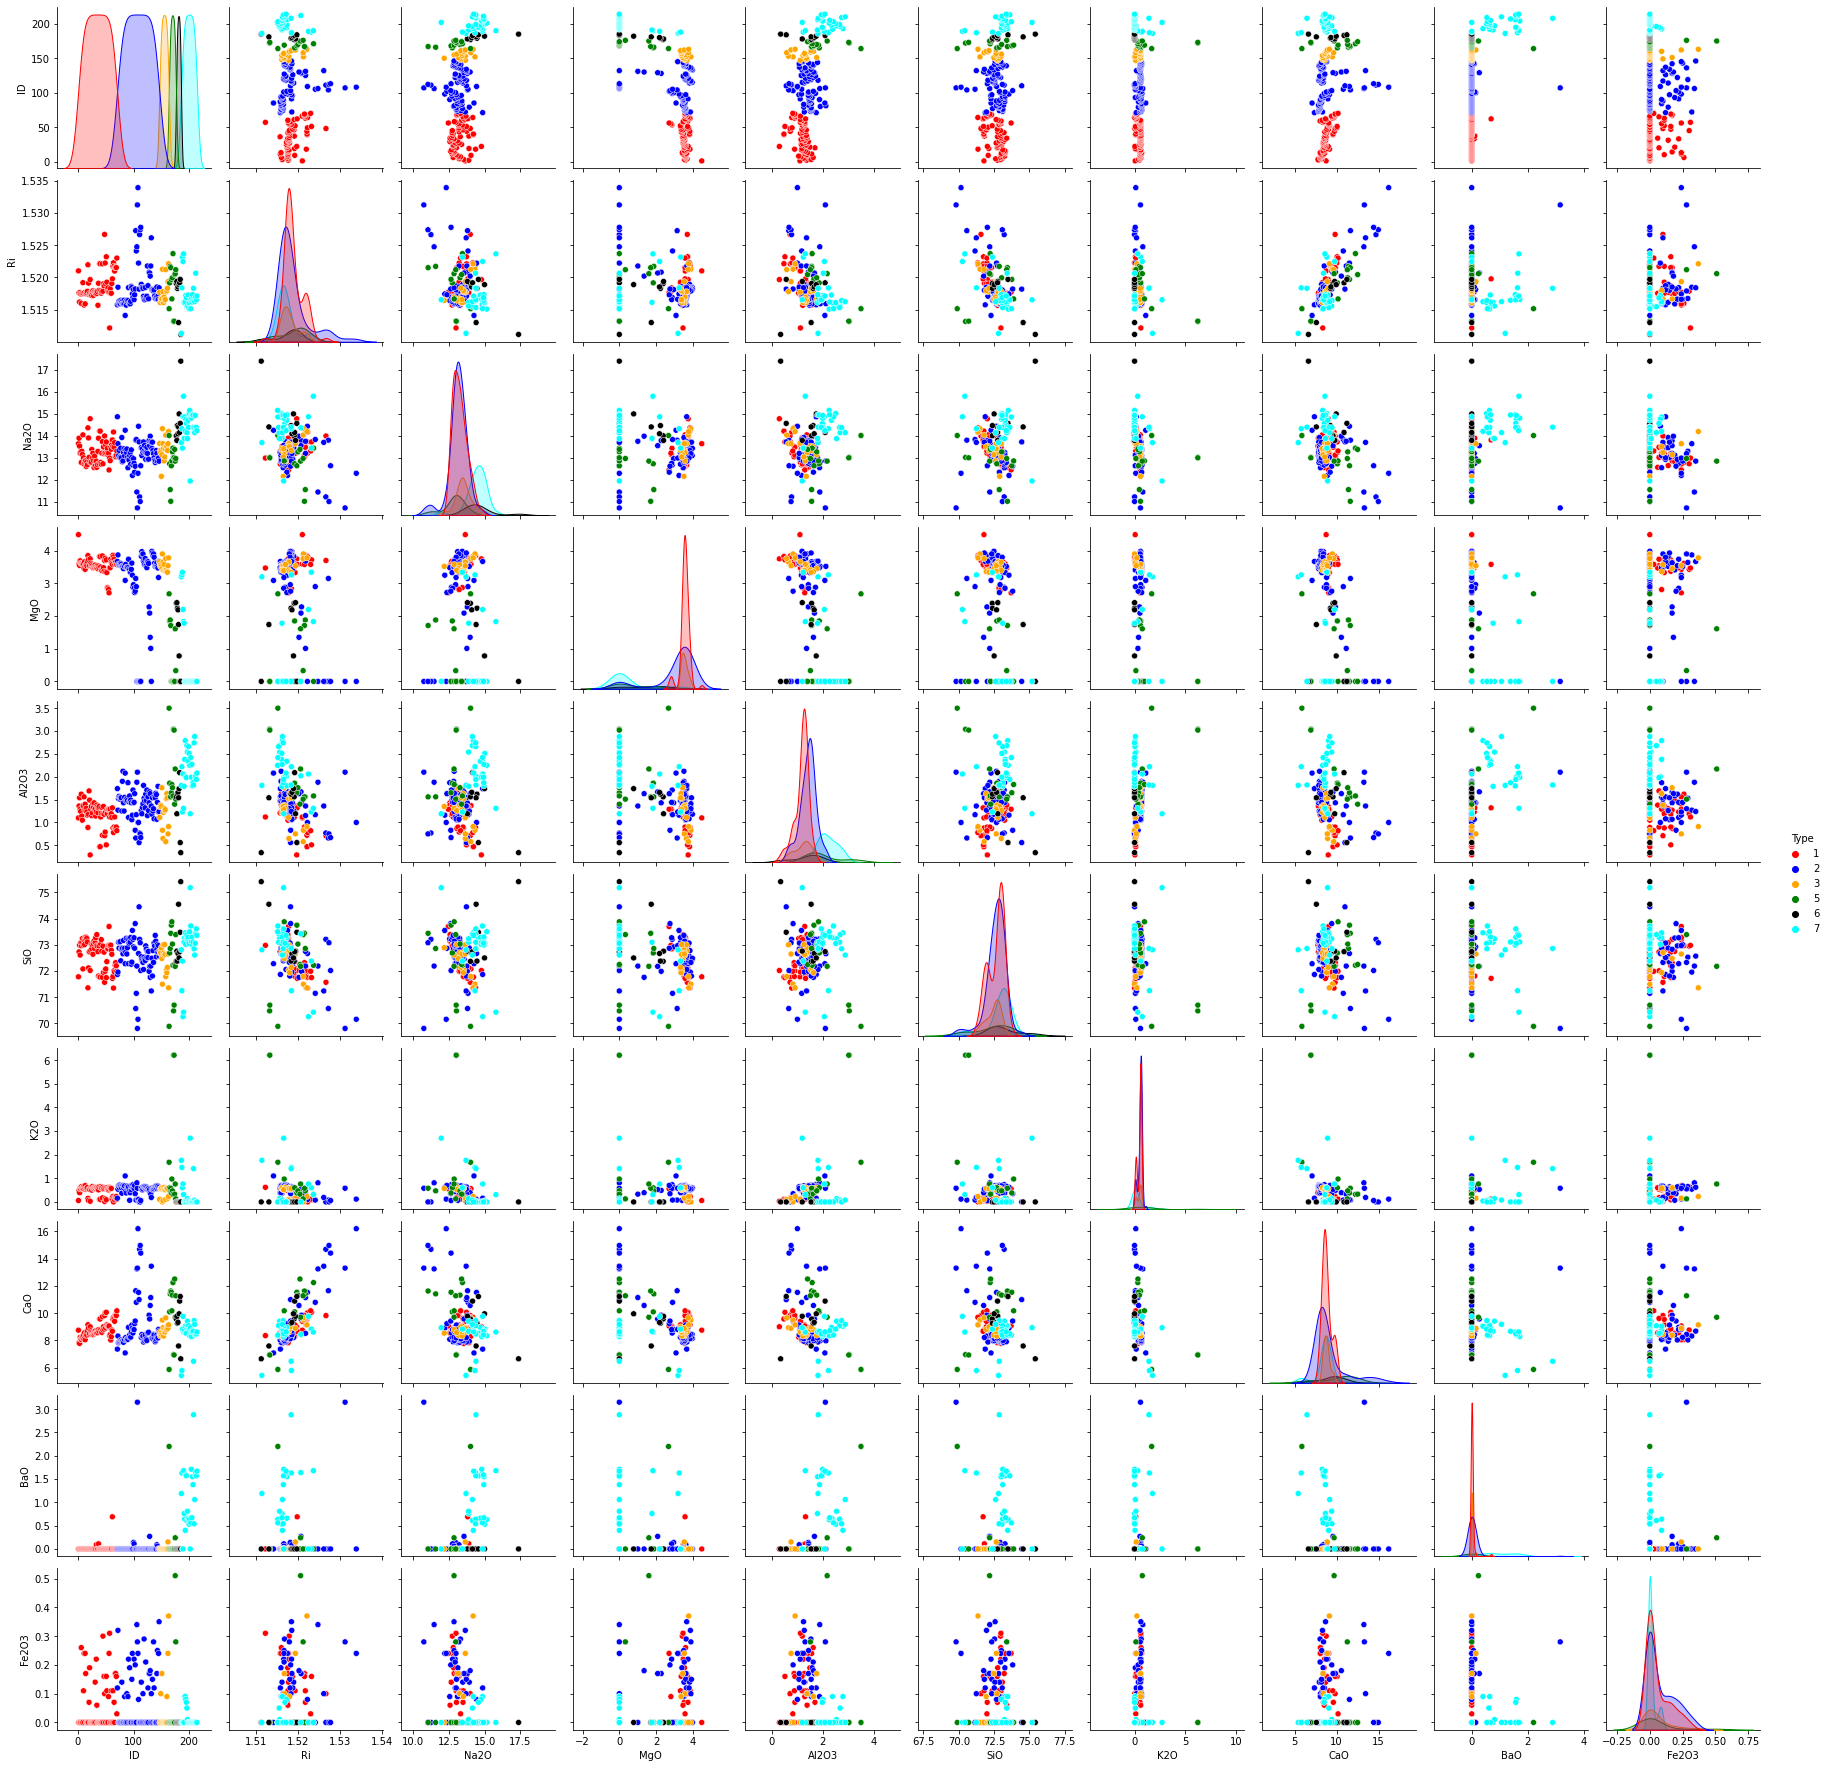

In [64]:
#Файловый способ подключения выборки данных
from google.colab import drive
drive.mount('/content/drive')

# # Сброс ограничений на количество выводимых рядов
# pd.set_option('display.max_rows', None)
# # Сброс ограничений на число столбцов
# pd.set_option('display.max_columns', None)
# # Сброс ограничений на количество символов в записи
# pd.set_option('display.max_colwidth', None)

data = pd.read_csv('drive/MyDrive/ММО/glass.csv')

X = data[["ID","Ri","Na2O","MgO","Al2O3","SiO","K2O","CaO","BaO","Fe2O3"]]
Y = data[["Type"]]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.4,   # Процент элементов в контрольной выборке
                                                    random_state = 1)  # Фиксация разбиения на обучение и контроль

plt.figure(figsize=(10,8),dpi=80, facecolor='green')
sns.pairplot(data, hue='Type', palette = {1:'red',2:'blue',3:'orange',5:'green',6:'black',7:'cyan'})     
plt.show()                                               


In [65]:
# Класс метода окна Парзена 
class KDEClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, bandwidth = 1.0, kernel = 'gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = []
        for yi in self.classes_:
          values = [y == yi][0]
          training_sets.append(X[np.array(values, dtype=bool)])
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims = True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


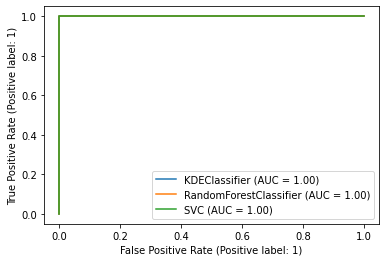

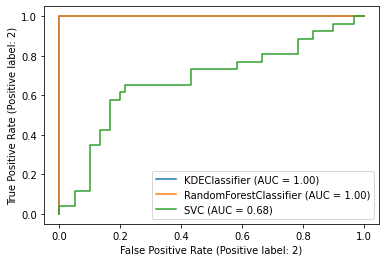

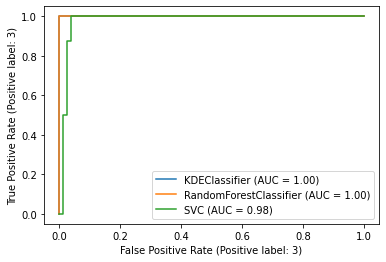

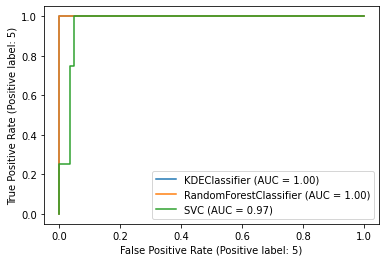

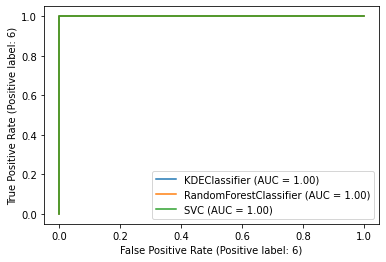

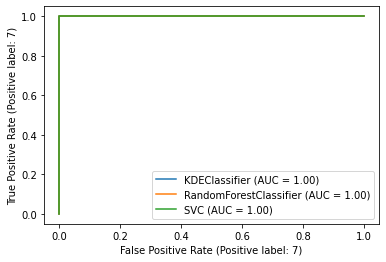

In [66]:
list=[[2,3,5,6,7],[1,3,5,6,7],[1,2,5,6,7],[1,2,3,6,7],[1,2,3,5,7],[1,2,3,5,6]]
for i in range(0,6):
  #Файловый способ подключения выборки данных
  from google.colab import drive
  drive.mount('/content/drive')
  data = pd.read_csv('drive/MyDrive/ММО/glass.csv')
  X = data.drop('Type', axis = 1)
  #классы: 1 2 3 5 6 7 8
  Y = data.Type.replace(list[i][0],0).replace(list[i][1],0).replace(list[i][2],0).replace(list[i][3],0).replace(list[i][4],0)
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y,  
                                                    test_size = 0.4,   # Процент элементов в контрольной выборке
                                                    random_state = 1)  # Фиксация разбиения на обучение и контроль

  models = []
  #метрические методы
  #models.append(KNeighborsClassifier(n_neighbors=1))
  models.append(KDEClassifier(bandwidth = 2/10))

  #логические методы
  #models.append(DecisionTreeClassifier(criterion='entropy', max_depth=3,random_state=0))
  models.append(RandomForestClassifier(criterion='entropy', n_estimators=6, max_features=9, max_depth=3, random_state=0))

  #линейный метод
  models.append(SVC(kernel="linear", C=0.3, random_state=0))

  for m in models:
    m.fit(X_train,Y_train)
  disp = plot_roc_curve(models[0], X_test, Y_test)
  for m in models[1:]:
    plot_roc_curve(m, X_test, Y_test, ax = disp.ax_)

# Заключение

Победителем Лиги чемпионов для выборки "Glass Identification Database" является алгоритм "Случайный лес" (ансамбль деревьев). 
Площадь под графиком ROC-кривой(AUC) для алгоритма "Метод опорных векторов" для большинства классов наибольшая среди представленных методов.